Fetal Health Classification

In [18]:
# Importing libraries
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

import sklearn.ensemble

# Module to save and load Python objects to and from files
import pickle 


In [19]:
# Import Data
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [20]:
# Distribution of Species column
df['fetal_health'].value_counts(normalize = True)

fetal_health
1.0    0.778457
2.0    0.138758
3.0    0.082785
Name: proportion, dtype: float64

In [21]:
# Output column for prediction
output = df['fetal_health'] 

# Input features (excluding year column)
features = df[['baseline value','accelerations','fetal_movement','uterine_contractions','light_decelerations','severe_decelerations',
               'prolongued_decelerations','abnormal_short_term_variability','mean_value_of_short_term_variability',
               'percentage_of_time_with_abnormal_long_term_variability','mean_value_of_long_term_variability','histogram_width',
               'histogram_min','histogram_max','histogram_number_of_peaks','histogram_number_of_zeroes','histogram_mode','histogram_mean',
               'histogram_median','histogram_variance','histogram_tendency']] 

In [22]:
# Data partitioning into training and testing
train_X, test_X, train_y, test_y = train_test_split(features, output, test_size = 0.2, random_state = 24) 

# Defining prediction model
dt_clf = DecisionTreeClassifier(random_state = 24)

# Fitting model on training data
dt_clf.fit(train_X, train_y)


rf_clf = sklearn.ensemble.RandomForestClassifier(random_state=0)
# Fitting model on training data
rf_clf.fit(train_X, train_y)

ada_clf = sklearn.ensemble.AdaBoostClassifier(estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME', random_state=24)

ada_clf.fit(train_X, train_y)




AdaBoostClassifier(algorithm='SAMME', random_state=24)

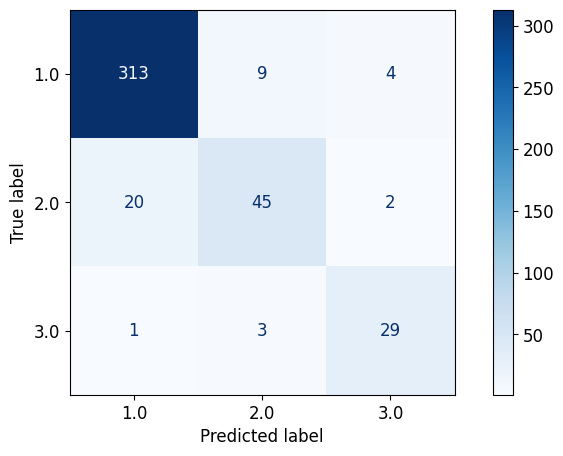

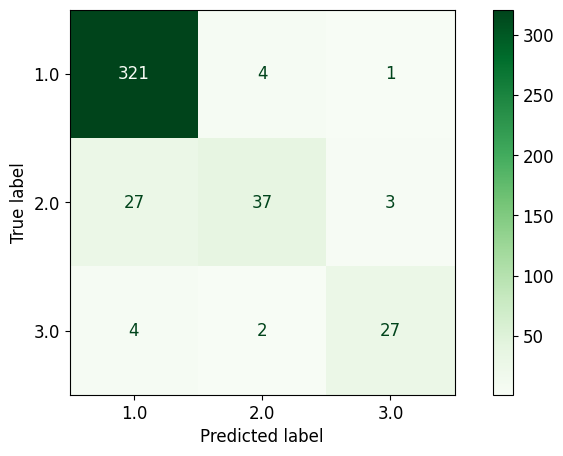

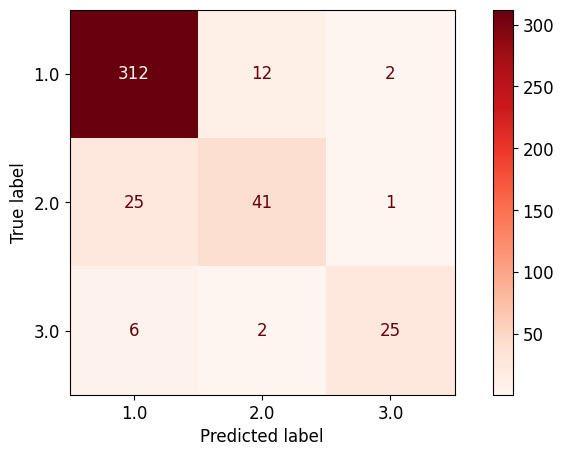

In [23]:
# Predictions on test set
dt_y_pred = dt_clf.predict(test_X)

# Now generate confusion matrix
dt_cm = confusion_matrix(test_y, dt_y_pred, labels = dt_clf.classes_)
dt_disp = ConfusionMatrixDisplay(confusion_matrix = dt_cm, display_labels = dt_clf.classes_)

# Specify figure size
dt_fig, ax = plt.subplots(figsize = (10, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
dt_disp.plot(cmap = 'Blues', ax=ax )

# Save confusion Matrix
dt_fig.savefig('fetal_dt_confusion_mat.svg')

# Predictions on test set
rf_y_pred = rf_clf.predict(test_X)

# Now generate confusion matrix
rf_cm = confusion_matrix(test_y, rf_y_pred, labels = rf_clf.classes_)
rf_disp = ConfusionMatrixDisplay(confusion_matrix = rf_cm, display_labels = rf_clf.classes_)

# Specify figure size
rf_fig, ax = plt.subplots(figsize = (10, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
rf_disp.plot(cmap = 'Greens', ax=ax )

# Save confusion Matrix
rf_fig.savefig('fetal_rf_confusion_mat.svg')

# Predictions on test set
ada_y_pred = ada_clf.predict(test_X)

# Now generate confusion matrix
ada_cm = confusion_matrix(test_y, ada_y_pred, labels = ada_clf.classes_)
ada_disp = ConfusionMatrixDisplay(confusion_matrix = ada_cm, display_labels = ada_clf.classes_)

# Specify figure size
ada_fig, ax = plt.subplots(figsize = (10, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
ada_disp.plot(cmap = 'Reds', ax=ax )

# Save confusion Matrix
ada_fig.savefig('fetal_ada_confusion_mat.svg')

In [24]:
# Generating Classification Report
dt_report = classification_report(test_y, dt_y_pred, output_dict = True)
dt_report_df = pd.DataFrame(dt_report)
dt_report_df

# Save the report as a CSV File
dt_report_df.to_csv('fetal_class_dt_report.csv') 
dt_report_df.head()

# Generating Classification Report
rf_report = classification_report(test_y, rf_y_pred, output_dict = True)
rf_report_df = pd.DataFrame(rf_report)
rf_report_df

# Save the report as a CSV File
rf_report_df.to_csv('fetal_class_rf_report.csv') 
rf_report_df.head()

# Generating Classification Report
ada_report = classification_report(test_y, ada_y_pred, output_dict = True)
ada_report_df = pd.DataFrame(ada_report)
ada_report_df

# Save the report as a CSV File
ada_report_df.to_csv('fetal_class_ada_report.csv') 
ada_report_df.head()

,1.0,2.0,3.0,accuracy,macro avg,weighted avg
precision,0.909621,0.745455,0.892857,0.887324,0.849311,0.882503
recall,0.957055,0.611940,0.757576,0.887324,0.775524,0.887324
f1-score,0.932735,0.672131,0.819672,0.887324,0.808180,0.882990
support,326.000000,67.000000,33.000000,0.887324,426.000000,426.000000


,1.0,2.0,3.0,accuracy,macro avg,weighted avg
precision,0.937126,0.789474,0.828571,0.908451,0.851724,0.905494
recall,0.960123,0.671642,0.878788,0.908451,0.836851,0.908451
f1-score,0.948485,0.725806,0.852941,0.908451,0.842411,0.906061
support,326.000000,67.000000,33.000000,0.908451,426.000000,426.000000


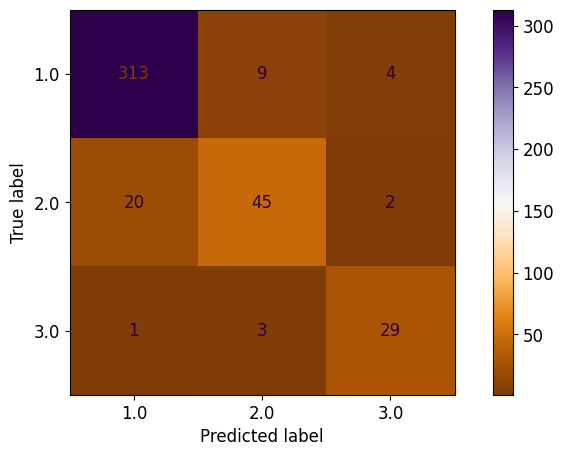

In [25]:
# Set Up Soft Voting Classifier
dt_f1 = dt_report_df['weighted avg']['f1-score']
rf_f1 = rf_report_df['weighted avg']['f1-score']
ada_f1 = ada_report_df['weighted avg']['f1-score']

sv_clf = sklearn.ensemble.VotingClassifier(estimators=[('dt',dt_clf), ('rf',rf_clf), ('ada',ada_clf)], voting='soft', weights=[dt_f1,rf_f1,ada_f1], n_jobs=None, flatten_transform=True, verbose=False)
sv_clf.fit(train_X, train_y)

# Predictions on test set
sv_y_pred = sv_clf.predict(test_X)

# Now generate confusion matrix
sv_cm = confusion_matrix(test_y, sv_y_pred, labels = sv_clf.classes_)
sv_disp = ConfusionMatrixDisplay(confusion_matrix = sv_cm, display_labels = sv_clf.classes_)

# Specify figure size
sv_fig, ax = plt.subplots(figsize = (10, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
sv_disp.plot(cmap = 'PuOr', ax=ax )

# Save confusion Matrix
sv_fig.savefig('fetal_sv_confusion_mat.svg')

# Generating Classification Report
sv_report = classification_report(test_y, sv_y_pred, output_dict = True)
sv_report_df = pd.DataFrame(sv_report)
sv_report_df

# Save the report as a CSV File
sv_report_df.to_csv('fetal_class_sv_report.csv') 
sv_report_df.head()

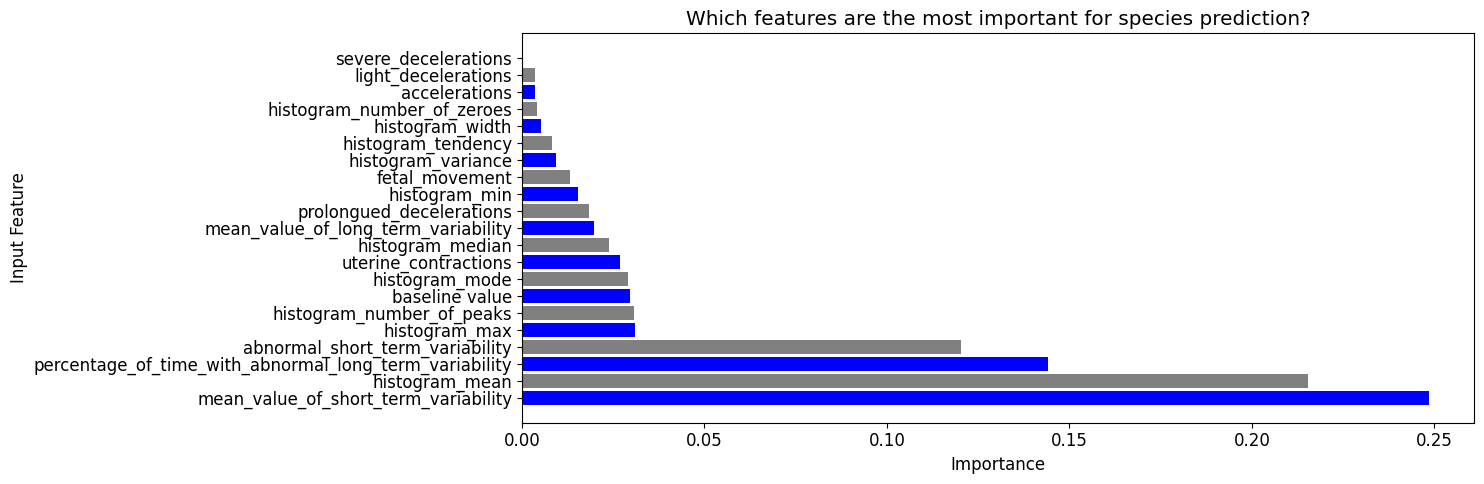

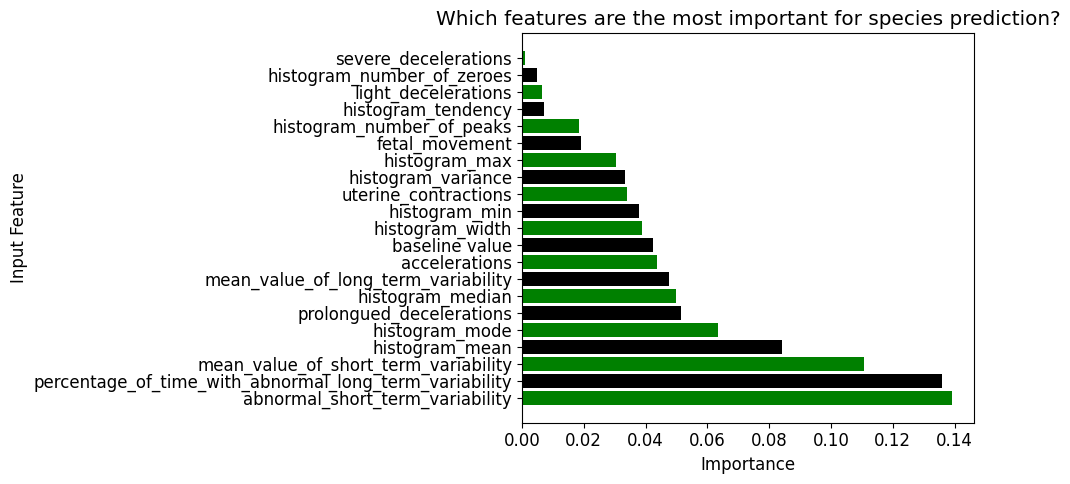

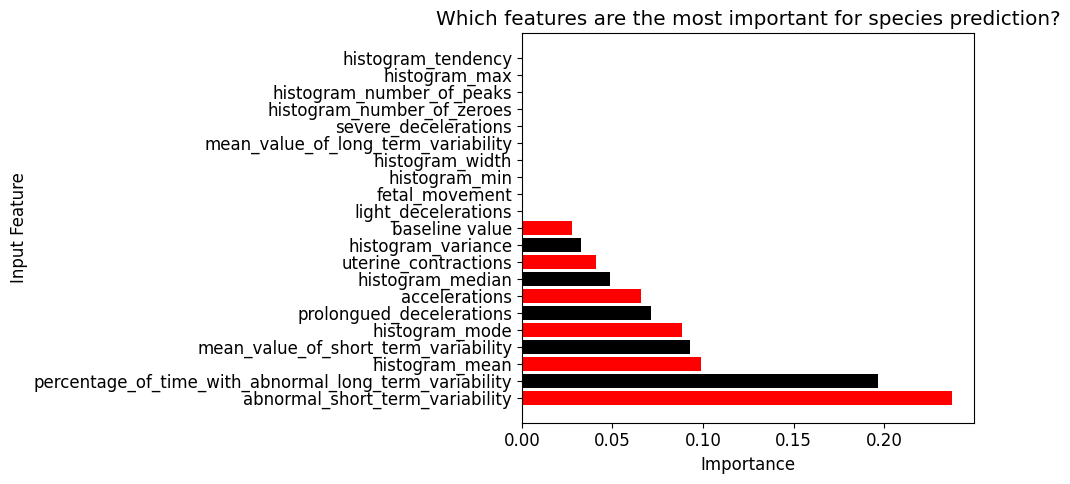

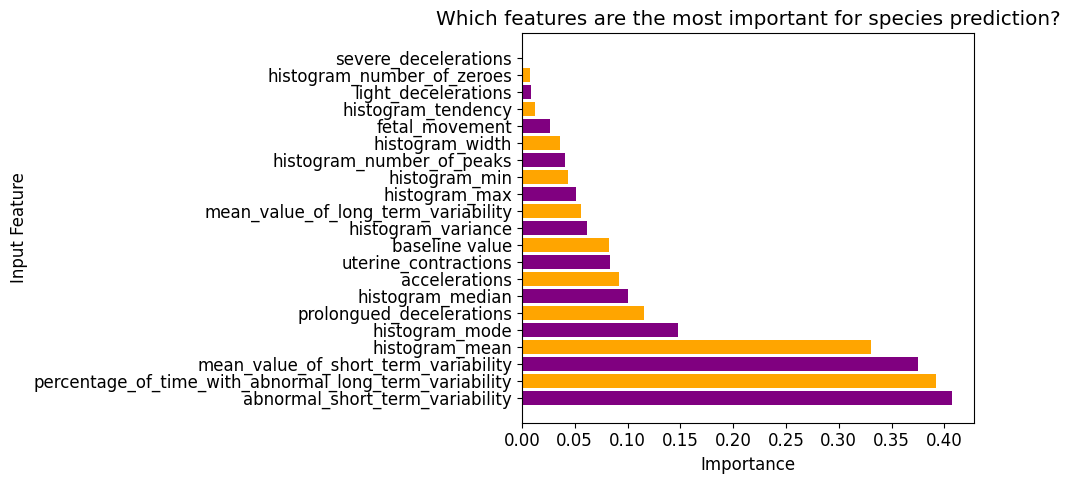

In [ ]:
# Storing importance values from the trained model
dt_importance = dt_clf.feature_importances_

# Storing feature importance as a dataframe
dt_feature_imp = pd.DataFrame(list(zip(train_X.columns, dt_importance)),
               columns = ['Feature', 'Importance'])

dt_feature_imp_sorted = dt_feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(dt_feature_imp_sorted['Feature'], dt_feature_imp_sorted['Importance'], color = ['blue', 'grey'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.tight_layout()
plt.savefig("fetal_dt_feature_imp.svg")

# Storing importance values from the trained model
rf_importance = rf_clf.feature_importances_

# Storing feature importance as a dataframe
rf_feature_imp = pd.DataFrame(list(zip(train_X.columns, rf_importance)),
               columns = ['Feature', 'Importance'])

rf_feature_imp_sorted = rf_feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(rf_feature_imp_sorted['Feature'], rf_feature_imp_sorted['Importance'], color = ['green', 'black'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.tight_layout()
plt.savefig("fetal_rf_feature_imp.svg")

# Storing importance values from the trained model
ada_importance = ada_clf.feature_importances_

# Storing feature importance as a dataframe
ada_feature_imp = pd.DataFrame(list(zip(train_X.columns, ada_importance)),
               columns = ['Feature', 'Importance'])

ada_feature_imp_sorted = ada_feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(ada_feature_imp_sorted['Feature'], ada_feature_imp_sorted['Importance'], color = ['red', 'black'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.tight_layout()
plt.savefig("fetal_ada_feature_imp.svg")

# Storing importance values from the trained model
dt_f1_macro = dt_report_df['macro avg']['f1-score']
rf_f1_macro = rf_report_df['macro avg']['f1-score']
ada_f1_macro = ada_report_df['macro avg']['f1-score']

sv_importance=[]
for i in range(len(dt_feature_imp)):
    F_i = dt_feature_imp['Importance'][i]*dt_f1_macro+rf_feature_imp['Importance'][i]*rf_f1_macro+ada_feature_imp['Importance'][i]*ada_f1_macro
    sv_importance.append(F_i)

sv_imp=pd.DataFrame(columns=['Feature', 'Importance'])
sv_imp['Importance'] = sv_importance
sv_imp['Feature'] = rf_feature_imp['Feature']


sv_feature_imp = sv_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(sv_feature_imp['Feature'], sv_feature_imp['Importance'], color = ['purple', 'orange'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.tight_layout()
plt.savefig("fetal_sv_feature_imp.svg")

In [27]:
sv_importance

[np.float64(0.08239731044337692),
 np.float64(0.09194414817857133),
 np.float64(0.026722033571847298),
 np.float64(0.08354027803225236),
 np.float64(0.008293257971887135),
 np.float64(0.0009311339955795928),
 np.float64(0.11548412778765496),
 np.float64(0.4077158133605874),
 np.float64(0.37508476278199443),
 np.float64(0.39178786244091746),
 np.float64(0.055795011949451113),
 np.float64(0.03640909090821054),
 np.float64(0.0439583177243318),
 np.float64(0.051072576404324645),
 np.float64(0.041050784806106536),
 np.float64(0.007351875284954866),
 np.float64(0.14785901037950533),
 np.float64(0.3301382807915503),
 np.float64(0.10005009634931925),
 np.float64(0.06137739956297973),
 np.float64(0.012753863561384573)]

In [28]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
fetal_dt_pickle = open('fetal_decision_tree.pickle', 'wb') 

# Write DT model to the file
pickle.dump(dt_clf, fetal_dt_pickle) 

# Close the file
fetal_dt_pickle.close() 

# Creating the file where we want to write the model
fetal_rf_pickle = open('fetal_random_forest.pickle', 'wb') 

# Write DT model to the file
pickle.dump(rf_clf, fetal_rf_pickle) 

# Close the file
fetal_rf_pickle.close() 

# Creating the file where we want to write the model
fetal_ada_pickle = open('fetal_ada_boost.pickle', 'wb') 

# Write DT model to the file
pickle.dump(ada_clf, fetal_ada_pickle) 

# Close the file
fetal_ada_pickle.close() 

# Creating the file where we want to write the model
fetal_sv_pickle = open('fetal_soft_voting.pickle', 'wb') 

# Write DT model to the file
pickle.dump(sv_clf, fetal_sv_pickle) 

# Close the file
fetal_sv_pickle.close() 